In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

# Introduction to Deep Learning
## Live Demos

In [3]:
# (2a + 3b)^2

In [3]:
a = tf.constant(300)
b = tf.constant(100)

In [4]:
tf.pow(tf.add(tf.multiply(2, a), tf.multiply(3, b)), 2)

<tf.Tensor: shape=(), dtype=int32, numpy=810000>

In [5]:
(2 * 30 + 3 * 10) ** 2

8100

In [6]:
(2 * a + 3 * b) ** 2

<tf.Tensor: shape=(), dtype=int32, numpy=810000>

In [7]:
bank_data = pd.read_csv("data/bank.csv", sep = ";", true_values = ["yes"], false_values = ["no"])

In [8]:
bank_data

age            job  marital  education  default  balance  housing  \
0      30     unemployed  married    primary    False     1787    False   
1      33       services  married  secondary    False     4789     True   
2      35     management   single   tertiary    False     1350     True   
3      30     management  married   tertiary    False     1476     True   
4      59    blue-collar  married  secondary    False        0     True   
...   ...            ...      ...        ...      ...      ...      ...   
4516   33       services  married  secondary    False     -333     True   
4517   57  self-employed  married   tertiary     True    -3313     True   
4518   57     technician  married  secondary    False      295    False   
4519   28    blue-collar  married  secondary    False     1137    False   
4520   44   entrepreneur   single   tertiary    False     1136     True   

       loan   contact  day month  duration  campaign  pdays  previous  \
0     False  cellular   19   oct        79         1     -1         0   
1      True  cellular   11   may       220         1    339         4   
2     False  cellular   16   apr       185         1    330         1   
3      True   unknown    3   jun       199         4     -1         0   
4     False   unknown    5   may       226         1     -1         0   
...     ...       ...  ...   ...       ...       ...    ...       ...   
4516  False  cellular   30   jul       329         5     -1         0   
4517   True   unknown    9   may       153         1     -1         0   
4518  False  cellular   19   aug       151        11     -1         0   
4519  False  cellular    6   feb       129         4    211         3   
4520   True  cellular    3   apr       345         2    249         7   

     poutcome      y  
0     unknown  False  
1     failure  False  
2     failure  False  
3     unknown  False  
4     unknown  False  
...       ...    ...  
4516  unknown  False  
4517  unknown  False  
4518  unknown  False  
4519    other  False  
4520    other  False  

[4521 rows x 17 columns]

In [9]:
bank_data.shape

(4521, 17)

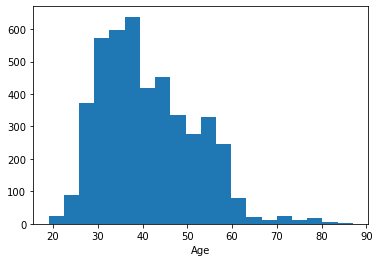

In [10]:
plt.hist(bank_data.age, bins = 20)
plt.xlabel("Age")
plt.show()

In [11]:
bank_data.dtypes

age           int64
job          object
marital      object
education    object
default        bool
balance       int64
housing        bool
loan           bool
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y              bool
dtype: object

In [12]:
bank_data = pd.get_dummies(bank_data)

In [13]:
bank_data.shape

(4521, 49)

In [14]:
bank_data = bank_data.astype(np.float64)

In [15]:
bank_data.dtypes

age                    float64
default                float64
balance                float64
housing                float64
loan                   float64
day                    float64
duration               float64
campaign               float64
pdays                  float64
previous               float64
y                      float64
job_admin.             float64
job_blue-collar        float64
job_entrepreneur       float64
job_housemaid          float64
job_management         float64
job_retired            float64
job_self-employed      float64
job_services           float64
job_student            float64
job_technician         float64
job_unemployed         float64
job_unknown            float64
marital_divorced       float64
marital_married        float64
marital_single         float64
education_primary      float64
education_secondary    float64
education_tertiary     float64
education_unknown      float64
contact_cellular       float64
contact_telephone      float64
contact_

In [16]:
attributes = bank_data.drop(["y"], axis = 1)

In [17]:
labels = bank_data["y"]

In [18]:
min_max_scale = lambda col: (col - tf.reduce_min(col)) / (tf.reduce_max(col) - tf.reduce_min(col))

In [19]:
num_columns = attributes.shape[1]
transformed_columns = [min_max_scale(attributes.values[:, i]) for i in range(num_columns)]

In [20]:
bank_data_transformed = tf.stack(transformed_columns, axis = 1)

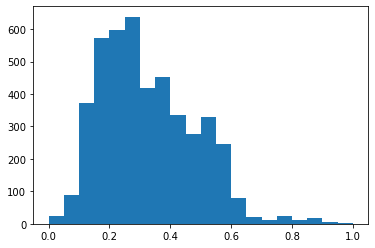

In [21]:
plt.hist(bank_data_transformed.numpy()[:, 0], bins = 20)
plt.show()

In [22]:
bank_data_transformed.shape

TensorShape([4521, 48])

In [23]:
labels = labels.astype(int).values

In [24]:
labels_onehot = tf.one_hot(labels, depth = 2)

In [25]:
logistic_regression = Sequential([
    Input(shape = num_columns),
    Dense(2, activation = "sigmoid")
])

In [26]:
logistic_regression.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 98        
Total params: 98
Trainable params: 98
Non-trainable params: 0
_________________________________________________________________


In [27]:
logistic_regression.compile(optimizer = "adam", loss = "categorical_crossentropy")

In [28]:
logistic_regression.fit(x = bank_data_transformed, y = labels_onehot, epochs = 10)

Train on 4521 samples
Epoch 1/10
4521/4521 [==============================] - 1s 319us/sample - loss: 0.5413
Epoch 2/10
4521/4521 [==============================] - 0s 76us/sample - loss: 0.3941
Epoch 3/10
4521/4521 [==============================] - 0s 81us/sample - loss: 0.3571
Epoch 4/10
4521/4521 [==============================] - 0s 81us/sample - loss: 0.3438
Epoch 5/10
4521/4521 [==============================] - 0s 72us/sample - loss: 0.3358
Epoch 6/10
4521/4521 [==============================] - 0s 77us/sample - loss: 0.3294
Epoch 7/10
4521/4521 [==============================] - 0s 72us/sample - loss: 0.3239
Epoch 8/10
4521/4521 [==============================] - 0s 73us/sample - loss: 0.3190
Epoch 9/10
4521/4521 [==============================] - 0s 71us/sample - loss: 0.3147
Epoch 10/10
4521/4521 [==============================] - 0s 72us/sample - loss: 0.3108


In [29]:
logistic_regression.layers[0].kernel

<tf.Variable 'dense/kernel:0' shape=(48, 2) dtype=float32, numpy=
array([[-0.00541852, -0.06579532],
       [ 0.29929292,  0.16340262],
       [ 0.05071618, -0.52371687],
       [ 0.33061892, -0.45253876],
       [ 0.03358259, -0.4654528 ],
       [-0.24648482, -0.42038235],
       [-0.8680444 ,  0.66851676],
       [ 0.17056197, -0.24075955],
       [ 0.00507716, -0.18021426],
       [-0.13172355,  0.31219843],
       [-0.14522241, -0.21452634],
       [ 0.4725276 , -0.43746105],
       [ 0.2316534 , -0.37466612],
       [ 0.00301334, -0.06800722],
       [-0.11018292, -0.1375865 ],
       [ 0.05484292,  0.24534829],
       [ 0.2192383 ,  0.02324738],
       [ 0.07076136, -0.09907352],
       [-0.02361049,  0.21390328],
       [ 0.18141864, -0.08573345],
       [ 0.21884018, -0.02630089],
       [-0.322581  , -0.32310504],
       [ 0.02307489,  0.00611686],
       [ 0.09698725, -0.21429873],
       [ 0.28648397, -0.03434074],
       [ 0.43386343, -0.31952927],
       [ 0.06648189, -0.

In [30]:
neural_network = Sequential([
    Input(shape = num_columns),
    Dense(30, activation = "relu"),
    Dense(20, activation = "relu"),
    Dense(10, activation = "relu"),
    Dense(2, activation = "sigmoid")
])

In [31]:
neural_network.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                1470      
_________________________________________________________________
dense_2 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 22        
Total params: 2,322
Trainable params: 2,322
Non-trainable params: 0
_________________________________________________________________


In [32]:
neural_network.compile(optimizer = "adam", loss = "categorical_crossentropy")

In [34]:
neural_network.fit(x = bank_data_transformed, y = labels_onehot, epochs = 10)

Train on 4521 samples
Epoch 1/10
4521/4521 [==============================] - 0s 89us/sample - loss: 0.2056
Epoch 2/10
4521/4521 [==============================] - 0s 82us/sample - loss: 0.2012
Epoch 3/10
4521/4521 [==============================] - 0s 85us/sample - loss: 0.1969
Epoch 4/10
4521/4521 [==============================] - 0s 78us/sample - loss: 0.1925
Epoch 5/10
4521/4521 [==============================] - 0s 77us/sample - loss: 0.1914
Epoch 6/10
4521/4521 [==============================] - 0s 79us/sample - loss: 0.1870
Epoch 7/10
4521/4521 [==============================] - 0s 82us/sample - loss: 0.1822
Epoch 8/10
4521/4521 [==============================] - 0s 77us/sample - loss: 0.1807
Epoch 9/10
4521/4521 [==============================] - 0s 82us/sample - loss: 0.1757
Epoch 10/10
4521/4521 [==============================] - 0s 78us/sample - loss: 0.1741
